<a href="https://colab.research.google.com/github/Ashutosh-AI/CNN/blob/main/ResNet50_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input # Transform Image to Model_competible image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.utils import to_categorical


import pandas as pd
import matplotlib.pyplot as plt
"""

from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions

"""

'\n\nfrom skimage.transform import resize\nfrom keras.applications.resnet50 import preprocess_input, decode_predictions\n\n'

In [2]:
num_classes = 100
nb_epochs = 10

#cifar100 =  cifar100.load_data()
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
train_set = train_datagen.flow(X_train, y_train, batch_size = 64)
test_set = test_datagen.flow(X_test, y_test)

In [6]:
resnet_model = ResNet50(weights = "imagenet", include_top = False, input_shape = [256, 256,3])

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

In [9]:
model = Sequential()
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = "softmax"))

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [11]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ResNet50_cifar100", save_best_only = True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [12]:
t = time.time()

history = model.fit_generator(train_set, 
                              len(train_set),
                              verbose = 1,
                              epochs = 15,
                              validation_data = test_set,
                              callbacks = [checkpoint_cb, earlystopping_cb])
print("Training Time: %s "%(t-time.time()))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
782/782 [==============================] - 525s 661ms/step - loss: 2.2581 - accuracy: 0.4252 - val_loss: 3.9688 - val_accuracy: 0.1857


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 2/15
782/782 [==============================] - 510s 652ms/step - loss: 1.3429 - accuracy: 0.6181 - val_loss: 1.0643 - val_accuracy: 0.6842


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 3/15
782/782 [==============================] - 513s 656ms/step - loss: 1.1331 - accuracy: 0.6696 - val_loss: 0.9538 - val_accuracy: 0.7166


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 4/15
782/782 [==============================] - 513s 656ms/step - loss: 1.0210 - accuracy: 0.6973 - val_loss: 0.9381 - val_accuracy: 0.7173


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 5/15
782/782 [==============================] - 510s 652ms/step - loss: 0.9343 - accuracy: 0.7188 - val_loss: 0.8683 - val_accuracy: 0.7401


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 6/15
782/782 [==============================] - 507s 648ms/step - loss: 0.8703 - accuracy: 0.7371 - val_loss: 0.8309 - val_accuracy: 0.7509


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 7/15
782/782 [==============================] - 507s 648ms/step - loss: 0.8193 - accuracy: 0.7526 - val_loss: 0.8337 - val_accuracy: 0.7539
Epoch 8/15
782/782 [==============================] - 510s 653ms/step - loss: 0.7822 - accuracy: 0.7610 - val_loss: 0.8432 - val_accuracy: 0.7452
Epoch 9/15
782/782 [==============================] - 513s 656ms/step - loss: 0.7368 - accuracy: 0.7716 - val_loss: 0.8145 - val_accuracy: 0.7597


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 10/15
782/782 [==============================] - 515s 659ms/step - loss: 0.7103 - accuracy: 0.7787 - val_loss: 0.8178 - val_accuracy: 0.7607
Epoch 11/15
782/782 [==============================] - 515s 659ms/step - loss: 0.6761 - accuracy: 0.7891 - val_loss: 0.8224 - val_accuracy: 0.7587
Epoch 12/15
782/782 [==============================] - 515s 659ms/step - loss: 0.6497 - accuracy: 0.7966 - val_loss: 0.8169 - val_accuracy: 0.7653
Epoch 13/15
782/782 [==============================] - 514s 657ms/step - loss: 0.6243 - accuracy: 0.8036 - val_loss: 0.8423 - val_accuracy: 0.7598
Epoch 14/15
782/782 [==============================] - 515s 658ms/step - loss: 0.5976 - accuracy: 0.8088 - val_loss: 0.8105 - val_accuracy: 0.7681


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ResNet50_cifar100/assets
Epoch 15/15
782/782 [==============================] - 515s 659ms/step - loss: 0.5815 - accuracy: 0.8153 - val_loss: 0.8372 - val_accuracy: 0.7622
Training Time: -7957.1290419101715 


In [17]:
model.save("Resnet50_Cifar.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [19]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.258101,0.42522,3.968785,0.1857
1,1.342900,0.61812,1.064263,0.6842
2,1.133102,0.66960,0.953750,0.7166
3,1.020991,0.69726,0.938111,0.7173
4,0.934323,0.71878,0.868302,0.7401
5,0.870268,0.73710,0.830857,0.7509
6,0.819330,0.75256,0.833690,0.7539
7,0.782169,0.76104,0.843189,0.7452
8,0.736801,0.77160,0.814451,0.7597
9,0.710298,0.77866,0.817844,0.7607


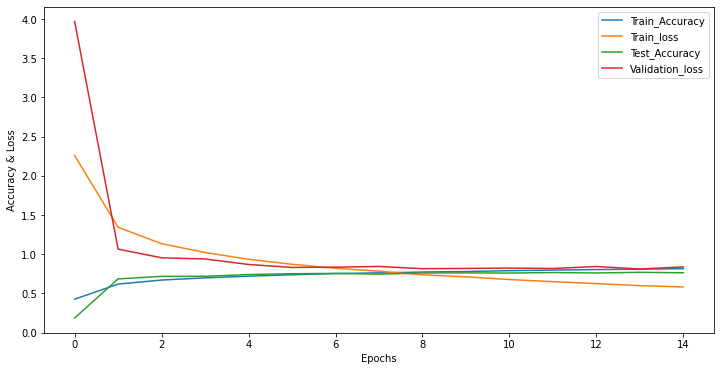

In [34]:
plt.figure(figsize = (12,6))
plt.plot(df["accuracy"], label = "Train_Accuracy")
plt.plot(df["loss"], label = "Train_loss")
plt.plot(df["val_accuracy"], label = "Test_Accuracy")
plt.plot(df["val_loss"], label = "Validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy & Loss")
plt.legend()
plt.show()
